# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [1]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# TODO: Set up a connection the "Market.db" database
...
sqlite3.connect("db/Market.db")
# TODO: Set up the cursor
...
conn = sqlite3.connect('db/Market.db')
cursor = conn.cursor()

### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [3]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
SELECT COUNT (*) 
FROM Products
WHERE Price <10;                                                             
""")

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [4]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT Country, COUNT(*) AS "NumberofSuppliers"
FROM Suppliers
GROUP BY Country
ORDER BY NumberofSuppliers DESC
LIMIT 1;                                                        
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 4)]


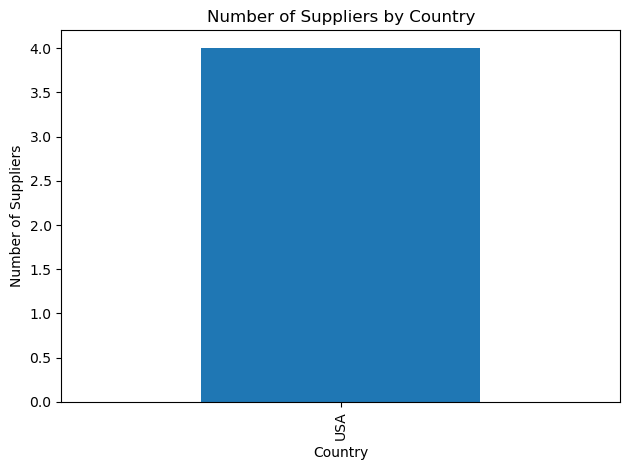

In [5]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'NumberofSuppliers'])

# TODO: Generate a visualization on this dataframe
df.plot(kind='bar', x='Country', y='NumberofSuppliers', legend=False)
plt.title('Number of Suppliers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Suppliers')
plt.tight_layout()
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [6]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT Country, COUNT(*) AS NumberOfCustomers
FROM Customers
GROUP BY Country
ORDER BY NumberOfCustomers DESC
LIMIT 1;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 13)]


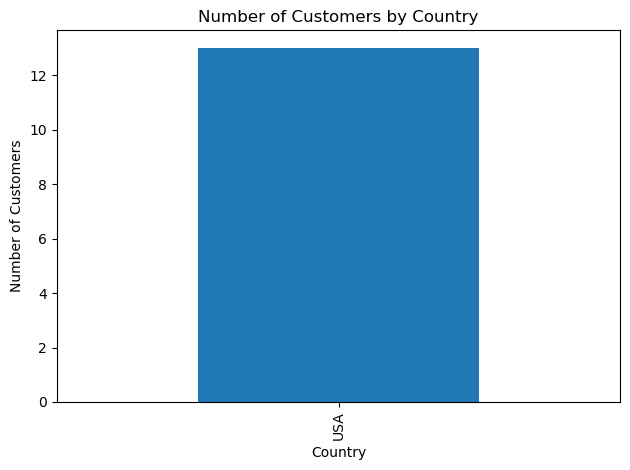

In [7]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'NumberofCustomers'])

# TODO: Generate a visualization on this dataframe
df.plot(kind='bar', x='Country', y='NumberofCustomers', legend=False)
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [8]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT p.ProductName, SUM(od.Quantity) AS TotalQuantity
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
GROUP BY p.ProductName
ORDER BY TotalQuantity ASC
LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]


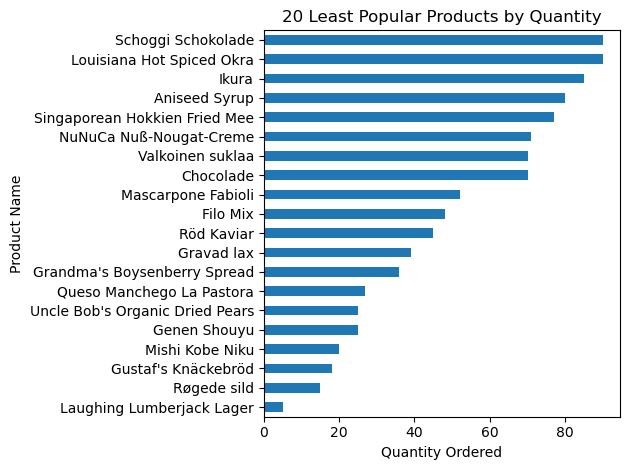

In [9]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'TotalQuantity'])

# TODO: Generate a visualization on this dataframe
df.plot(kind='barh', x='ProductName', y='TotalQuantity', legend=False)
plt.title('20 Least Popular Products by Quantity')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [10]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT p.ProductName, SUM(Quantity * Price) AS TotalRevenue
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
GROUP BY p.ProductName
ORDER BY TotalRevenue ASC
LIMIT 20;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5)]


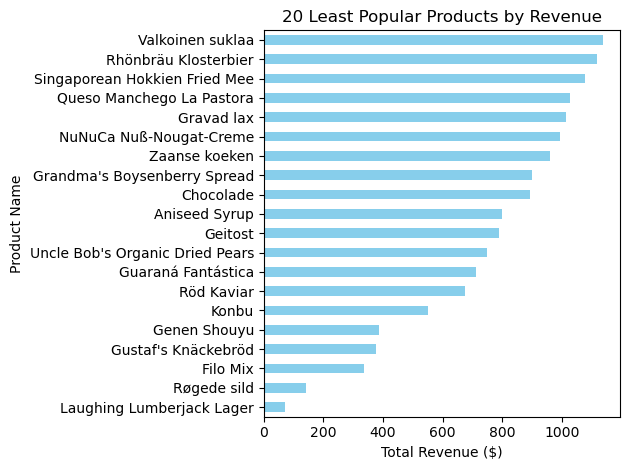

In [11]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(rows, columns=['ProductName', 'TotalRevenue'])

# TODO: Generate a visualization on this dataframe
df.plot(kind='barh', x='ProductName', y='TotalRevenue', legend=False, color='skyblue')
plt.title('20 Least Popular Products by Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [12]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT c.Country, COUNT(*) AS TotalOrders
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID
GROUP BY c.Country
ORDER BY TotalOrders DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 29), ('Germany', 25), ('Brazil', 19), ('France', 18), ('Austria', 13), ('UK', 12), ('Venezuela', 9), ('Mexico', 9), ('Canada', 9), ('Finland', 8), ('Sweden', 7), ('Spain', 7), ('Italy', 7), ('Ireland', 6), ('Portugal', 5), ('Switzerland', 4), ('Denmark', 4), ('Belgium', 2), ('Poland', 1), ('Norway', 1), ('Argentina', 1)]


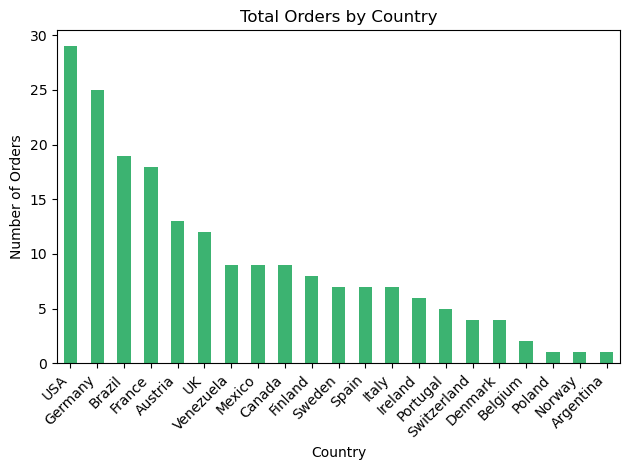

In [13]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'TotalOrders'])

# TODO: Generate a visualization on this dataframe
df.plot(kind='bar', x='Country', y='TotalOrders', legend=False, color='mediumseagreen')
plt.title('Total Orders by Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [14]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT c.Country, COUNT(*) AS CustomersWithoutOrders
FROM Customers c
LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
WHERE o.OrderID IS NULL
GROUP BY c.Country
ORDER BY CustomersWithoutOrders DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 5), ('France', 4), ('Germany', 2), ('Argentina', 2), ('UK', 1), ('Spain', 1), ('Canada', 1), ('Belgium', 1)]


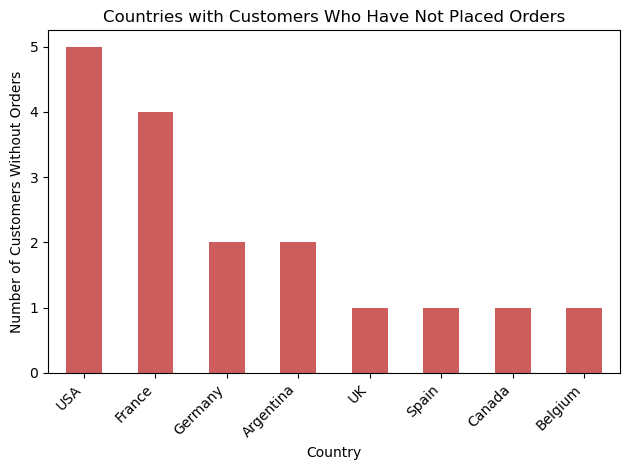

In [15]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country', 'CustomersWithoutOrders'])

# TODO: Generate a visualization on this dataframe
df.plot(kind='bar', x='Country', y='CustomersWithoutOrders', legend=False, color='indianred')
plt.title('Countries with Customers Who Have Not Placed Orders')
plt.xlabel('Country')
plt.ylabel('Number of Customers Without Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [16]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT s.SupplierName, COUNT(*) AS OrderCount
FROM OrderDetails od
JOIN Products p ON od.ProductID = p.ProductID
JOIN Suppliers s ON p.SupplierID = s.SupplierID
GROUP BY s.SupplierName
ORDER BY OrderCount DESC;
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 19), ('New England Seafood Cannery', 17), ("Mayumi's", 17), ('Leka Trading', 17), ('Bigfoot Breweries', 16), ('Heli Süßwaren GmbH & Co. KG', 15), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Svensk Sjöföda AB', 14), ('Tokyo Traders', 12), ('Refrescos Americanas LTDA', 11), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ('Lyngbysild', 8), ('PB Knäckebröd AB', 6), ("Grandma Kelly's Homestead", 6), ('Zaanse Snoepfabriek', 4), ('Escargots Nouveaux', 4)]


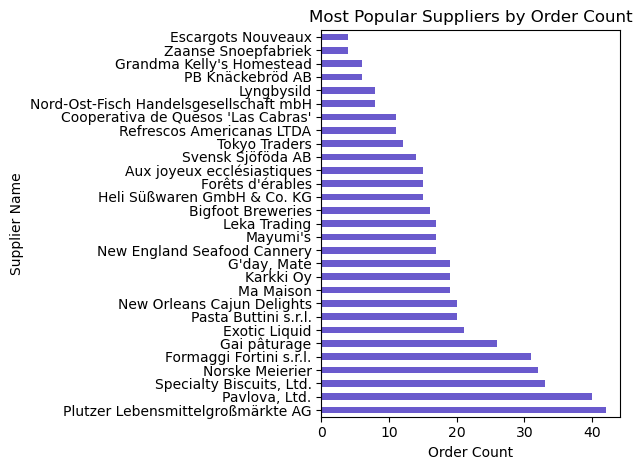

In [17]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['SupplierName', 'OrderCount'])

# TODO: Generate a visualization on this dataframe
df.plot(kind='barh', x='SupplierName', y='OrderCount', legend=False, color='slateblue')
plt.title('Most Popular Suppliers by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Supplier Name')
plt.tight_layout()
plt.show()

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

The USA has the greatest number of customers. The more customers means the more suppliers. The first two questions supports the evidence with the visuals. 

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

Laughing Lumberjack Lager. The least popular product generates the least revenue. This is depicted in Question 5. 

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

USA has the most orders. USA also has the most customers who have not placed orders. 

### Question 4

Which supplier has the most orders? Which evidence supports your answer?

Plutzee LebensmittelgroBmaekte AG